# Supply Chain Operations

Find the optimal K in the range of - to 200 for the moving averages formula algorithmically.

In [521]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import datetime
import os

First, read the CSV file

In [522]:
file = pd.read_csv('data.csv')

Set index and remove unnecessary columns

In [523]:
file.set_index('Period', inplace=True)
data = file[file.columns.drop(['Part DN', 'Part DP'])]
# Add a column for the prediction and error



In [524]:
data[0:3]

,Date,Part FF
Period,,
1,01.01.2023,18
2,02.01.2023,41
3,03.01.2023,115


Get the moving average for K = 5

In [525]:
def moving_average(k, indext):
    sum = 0
    offset = indext - k

    for i in range(0+offset, k+offset):
        sum += data.iloc[i]['Part FF']

    # Set value at the 4th row with sum/3 in the column Prediction
    mov_av = sum/k
    error_sqrt = np.power(data.iloc[indext]['Part FF'] - mov_av, 2)
    return data, mov_av, error_sqrt


In [526]:
moving_average(5, 5)[0][0:10]

,Date,Part FF
Period,,
1,01.01.2023,18
2,02.01.2023,41
3,03.01.2023,115
4,04.01.2023,125
5,05.01.2023,107
6,06.01.2023,90
7,07.01.2023,44
8,08.01.2023,116
9,09.01.2023,128


In [527]:
def moving_average_complete(k):
    sum_error = 0
    for i in range(k, 396):
        data, prediction, error = moving_average(k, i)
        error = moving_average(k, i)[2]
        sum_error += error
    
    sum_error = sum_error/(396-k+1)

    return data, sum_error



data, sum_error = moving_average_complete(5)
print(sum_error)

1491.8828571428567


In [528]:
data.head(10)

,Date,Part FF
Period,,
1,01.01.2023,18
2,02.01.2023,41
3,03.01.2023,115
4,04.01.2023,125
5,05.01.2023,107
6,06.01.2023,90
7,07.01.2023,44
8,08.01.2023,116
9,09.01.2023,128


In [540]:
# Try out K from 5 to to 200 and save the error along with its K value for a later plot
error = []
for k in range(5, 201):
    data, sum_error = moving_average_complete(k)
    error.append((k, sum_error))

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [530]:
error

[(5, 1491.8828571428567),
 (6, 1454.8680733162817),
 (7, 1404.704238618524),
 (8, 1393.9033579691518),
 (9, 1404.1063701158205),
 (10, 1380.7403359173127),
 (11, 1375.7546353787518),
 (12, 1361.0913961038948),
 (13, 1347.4478242110451),
 (14, 1339.989089891831),
 (15, 1328.1857009889457),
 (16, 1318.7984436515749),
 (17, 1302.698242578765),
 (18, 1300.8645884230752),
 (19, 1287.435782438553),
 (20, 1282.3797811671088),
 (21, 1282.6753992377091),
 (22, 1283.9223140495856),
 (23, 1281.935636808427),
 (24, 1283.6499757968406),
 (25, 1287.936855913978),
 (26, 1295.0633622545806),
 (27, 1297.2000333667),
 (28, 1296.3594795641825),
 (29, 1291.4886231453238),
 (30, 1294.548746594005),
 (31, 1293.5996343744837),
 (32, 1287.294780072774),
 (33, 1286.7761884580063),
 (34, 1286.159991706941),
 (35, 1280.1754560829845),
 (36, 1277.4986940426113),
 (37, 1278.0457531856184),
 (38, 1281.3757590722155),
 (39, 1282.7645275270972),
 (40, 1285.5484838935577),
 (41, 1286.516424479811),
 (42, 1289.19770368

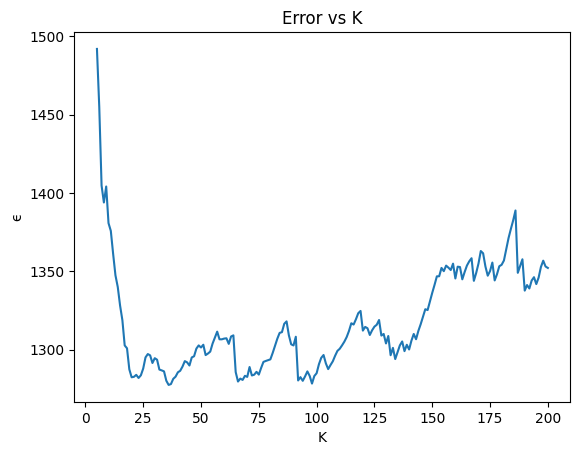

In [539]:
# PLot the error
plt.plot(*zip(*error))
plt.xlabel('K')
plt.ylabel('ϵ')
plt.title('Error vs K')
plt.savefig('plot.jpg')
plt.show()



In [532]:
# Output the K with the lowest error
min(error, key=lambda x: x[1])

(36, 1277.4986940426113)